In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
import graphviz

In [2]:
df = pd.read_csv('data/titanic_train.csv')
# Revisamos la cabecera de los datos para familiarizarnos con su contenido y con su 
df_head = df.head()
df_describe = df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Se muestra los primeros registros del dataset para familiarizarnos con el

In [3]:
# display
df_head

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Se muestra la descripcion de los datos
_Esta es una descripcion estadistica por lo cual de esta informacion podemos deducir cuales son los campos que contienen valores numericos_

In [4]:
# Display
df_describe

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Contamos los registros que contienen valores en las columnas
_Realizamos el conteo de los registros que contienen valores en las diferentes columnas. Es decir la instruccion df.count() lo que hace es contar los registros dentro del data frame que su valor es diferente a nulo o vacio._

_Tambien estamos imprimiendo cuantas filas tiene nuestro data frame y vemos que el numero es: 891_

_Dado este escenario lo que se puede ver es que el 77.1% de los registros no tienen un valor en el atributo 'Cabin' razon por la cual puede no ser un buen atributo para usarlo en nuestro modelo de machine learning_

_En el caso de la edad (__Age__) vemos que solo el 19.86% de los registros no tienen un valor para este atributo. Razon por la cual podremos usarlo para nuestro modelo de machine learning_

In [5]:
print(f"Filas del dataframe: {df.shape[0]}\n\n")
df.count()

Filas del dataframe: 891




PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

### Eliminamos la columna 'Cabin'

In [6]:
df = df.drop('Cabin', axis=1)

### Eliminamos la columna 'Ticket'

_Se decide eliminar la columna Ticket debido a que tenemos 680 registros con valores unicos para esta columna lo cual es el 76.3 % de los datos y consideramos no sera relevante en el modelo._

In [7]:
df['Ticket'].nunique()

681

In [8]:
df = df.drop('Ticket', axis=1)

### Revisamos por encima los campos Nan
_Verificamos que campos estan con valores nulos y vemos que el campo 'Age' es el que lleva gran parte de estos valores nulos._

In [9]:
null_rows = df.isna().any(axis=1)
df[null_rows]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,13.0000,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,7.2250,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,7.2250,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,7.8792,Q
...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,7.2292,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,69.5500,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,9.5000,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,7.8958,S


### Mediana en las columnas numericas
_Con el objetivo de poder usar la columna edad en el algoritmo de machine learning llenaremos los campos faltantes con un valor dado por la mediana de la columna. en este caso Edad._

In [10]:
numeric_cols = df.select_dtypes(include=np.number).columns
print(f"Columnas numericas:\n{numeric_cols}\n\n")
mean_values = df[numeric_cols].median()
print(mean_values)

# Se remplazan los valores nulos por su respectiva mediana de la columna
df.fillna(mean_values, inplace=True)

Columnas numericas:
Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')


PassengerId    446.0000
Survived         0.0000
Pclass           3.0000
Age             28.0000
SibSp            0.0000
Parch            0.0000
Fare            14.4542
dtype: float64


### Revisamos que columnas tienen el valores nulos.
_Reavisamos que columnas tienen valores nulos y vemos que hay dos registros que no tienen valor en la columna Embarked. Como este campo hace referencia a el puerto en el que se embarcaron cada uno de los pasajeros, no podemos predecir este valor, asi que eliminamos estos registros que contienen valores nulos en la columna Embarked._

In [11]:
null_rows = df.isna().any(axis=1)
df[null_rows]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,80.0,NaN


In [12]:
# Eliminamos los registros que en alguna columna tienen un valor Nulo. En este caso los dos registros que anteriormente vimos
df = df.dropna()
null_rows = df.isna().any(axis=1)
print(f"Filas con valores nulos: {df[null_rows].shape[0]}")

Filas con valores nulos: 0


### Arbol de decision

_Con esto en mente ahora lo que haremos es crear el arbol de decision. Ya que tenemos la data limpia._

__Pero como una de las ultimas medida, no incluiremos dentro de la data de entrenamiento de nuestro modelo las siguientes columnas: (PassengerId, Name) porque no creo que sea importante el id y el nombre del pasajero a la hora de predecir si sobrevivio o no__

In [13]:
columns = [i for i in range(0,10)]
exclude_columns = [0, 1, 3]
for column in exclude_columns:
    columns.remove(column)
df
x = df.iloc[:,columns]
y = df.iloc[:,1]

# Aqui vemos que la variable a predecir ya no se encuentra incluida dentro del valor de la variable 'x'
# que hace referencia a los datos que influyen en la prediccion. Adicional no tenemos columnas que son irrelevantes para nuestro modelo
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


### Codificacion de variables categoricas

__Adicional se eliminaran las columnas Sex y Embarked. Estas seran transformadas a opciones binarias para que sean procesables por nuestro modelo de machine learning.__

In [14]:
x = pd.get_dummies(x, columns=['Sex', 'Embarked'])
x

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,19.0,0,0,30.0000,1,0,0,0,1
888,3,28.0,1,2,23.4500,1,0,0,0,1
889,1,26.0,0,0,30.0000,0,1,1,0,0


#### Division de los datos
_Se realiza la division de los datos en datos de entrenamiento y datos de prueba._

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, train_size=0.7, random_state=2)

In [16]:
decision_model = DecisionTreeClassifier(random_state=42, max_depth=3)
decision_model.fit(X_train, Y_train)
y_pred = decision_model.predict(X_test)

_Una vez tenemos las predicciones que esta haciendo nuestro modelo lo que hacemos es verificar por medio de la funcion accuracy_score que tan acertado es nuestro modelo dandonos un valor entre 0 y 1. Cuando el valor tiende a 1 significa que el modelo predice y clasifica bien gran cantidad de datos_

In [17]:
accuracy = accuracy_score(Y_test, y_pred)
print(f"Precision: {accuracy}")

Precision: 0.8689138576779026


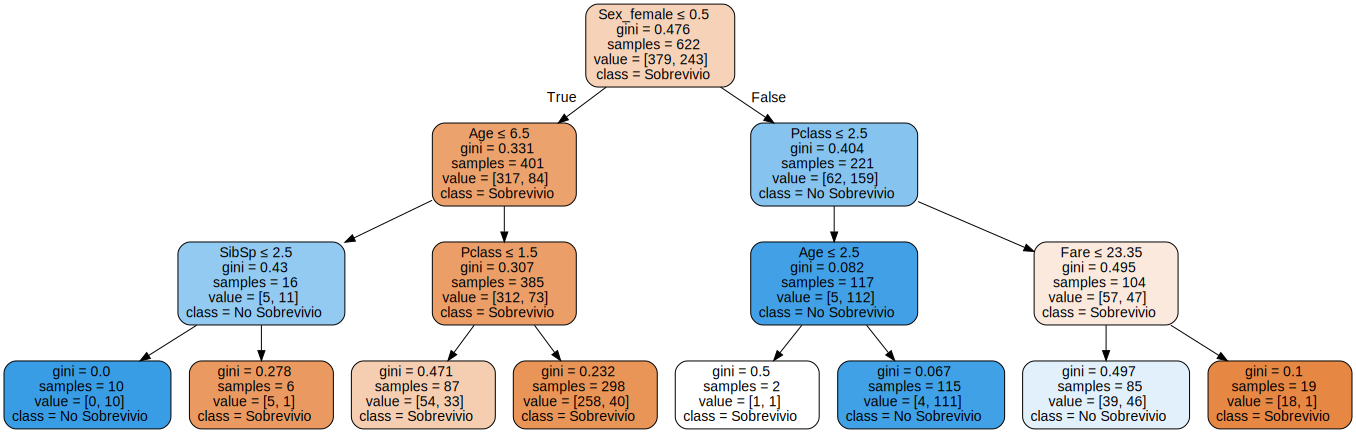

In [18]:
_class_names = ["Sobrevivio", "No Sobrevivio"]
decision_data = export_graphviz(
    decision_model, out_file=None,
    feature_names=x.columns, class_names=_class_names,  
    filled=True, rounded=True, special_characters=True
)
graph = graphviz.Source(decision_data)
graph